In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("./clean_data_clst.csv")

# features = ['total_throughput', 'latitude', 'longitude', 'square_id', 'average_latency']
features = ['latitude', 'longitude', 'average_latency', 'total_throughput', 'speed']
X = data[features]
X

,latitude,longitude,average_latency,total_throughput,speed
0,-37.712639,144.852460,39.625,0.00,0.175940
1,-37.712650,144.852456,39.875,0.00,0.057412
2,-37.712655,144.852454,31.850,0.00,0.138900
3,-37.712660,144.852454,37.500,0.00,0.187052
4,-37.712660,144.852453,42.575,0.00,0.088896
...,...,...,...,...,...
2079050,-37.712646,144.852355,121.500,17.29,6.833880
2079051,-37.712645,144.852384,50.425,27.40,7.089456
2079052,-37.712645,144.852384,50.425,27.40,7.089456
2079053,-37.712652,144.852409,59.850,33.50,7.667280


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

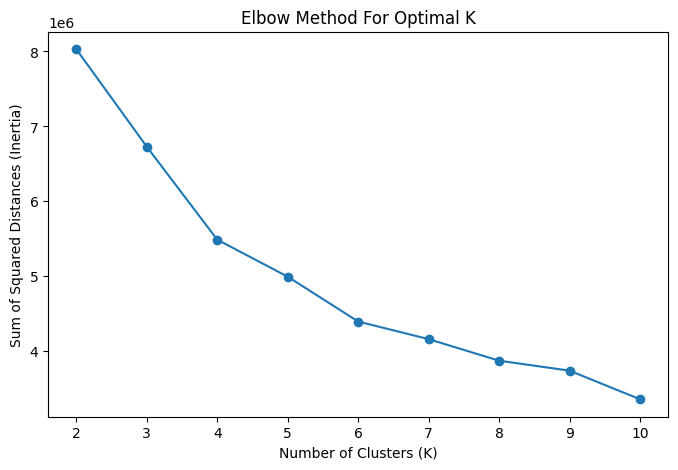

In [4]:
# Standardise the data (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters (K) using the Elbow Method
sse = []  # Sum of squared distances to closest cluster center
for k in range(2, 11):  # Trying different values of K from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)


# Plot SSE for each K to visualize the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method For Optimal K')
plt.show()

In [5]:
k_kmeans = {}

for optimal_k in range(2, 11):
    print("K =", optimal_k)
    # Fit the final KMeans model with the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans.fit(X_scaled)
    
    # Add the cluster labels back to the original dataset
    data[f'k{optimal_k}_cluster'] = kmeans.labels_

    k_kmeans[optimal_k] = kmeans



K = 2
K = 3
K = 4
K = 5
K = 6
K = 7
K = 8
K = 9
K = 10


In [6]:
# for k_to_plot in range(5, 11):
#     # Evaluate the clusters using Silhouette Score
#     # silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
#     # print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')
#     centers_array = scaler.inverse_transform(k_kmeans[k_to_plot].cluster_centers_)
#     centers = pd.DataFrame(centers_array)
#     centers.columns = features
    
#     plt.figure(figsize=(10, 6))
#     plt.scatter(data['longitude'], data['latitude'], c=data[f'k{k_to_plot}_cluster'], s=1)
#     plt.scatter(centers['longitude'], centers['latitude'], c='red', marker='X', s=20, label='Centroids')
#     plt.xlabel('Longitude')
#     plt.ylabel('Latitude')
#     plt.title(f'{k_to_plot} clusters of 5G Network Performance')
#     plt.colorbar(label='Cluster')
#     plt.show()

In [18]:
# Save scaler and model
import pickle

# k = 10 has been experimentally determined to be the best
with open("clustering_model_kmeans.pkl", "wb") as f:
    pickle.dump(k_kmeans[10], f)

with open("clustering_scaler_kmeans.pkl", "wb") as f:
    pickle.dump(scaler, f)

                speed  total_throughput  average_latency
k2_cluster                                              
0           14.981671         30.607618       103.348112
1           14.343789          7.177486       915.983893


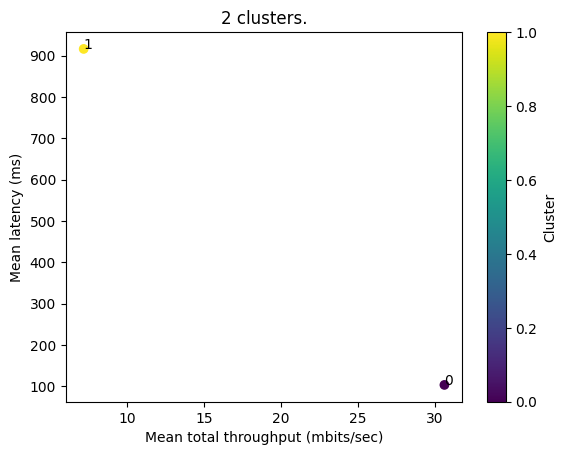

                speed  total_throughput  average_latency
k3_cluster                                              
0            8.323891         31.911139       111.387255
1           14.121500          6.798654       936.184477
2           23.983276         28.394802       104.639761


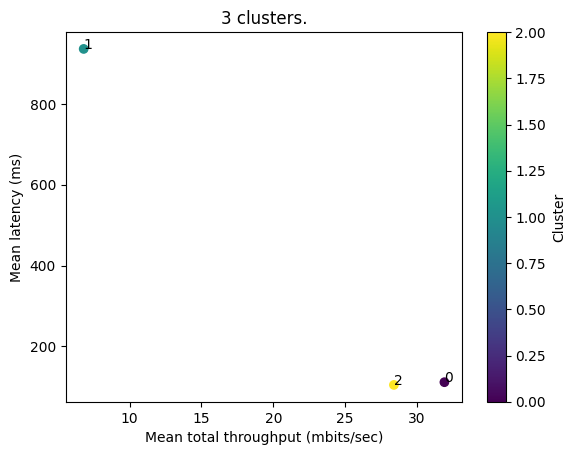

                speed  total_throughput  average_latency
k4_cluster                                              
0            6.876282         33.420161       109.112643
1           10.615103          6.847719       934.844999
2            7.061075         26.990802       112.793664
3           71.257937         29.092342       175.176267


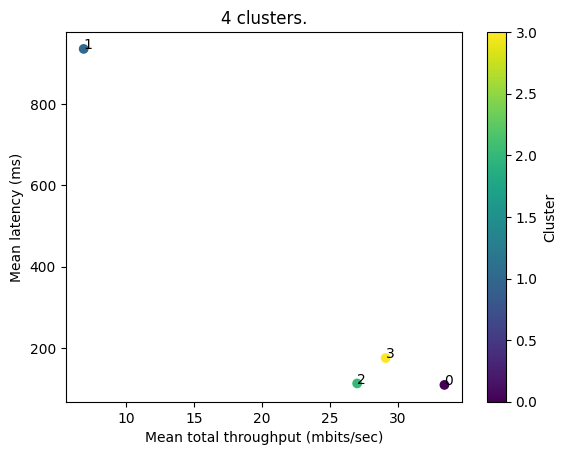

                speed  total_throughput  average_latency
k5_cluster                                              
0            6.830635         33.231622       104.277234
1           13.334711          8.794875       702.738860
2            6.758315         28.267834       104.351499
3           71.319813         29.494756       166.051193
4            9.305469          7.622499       935.411696


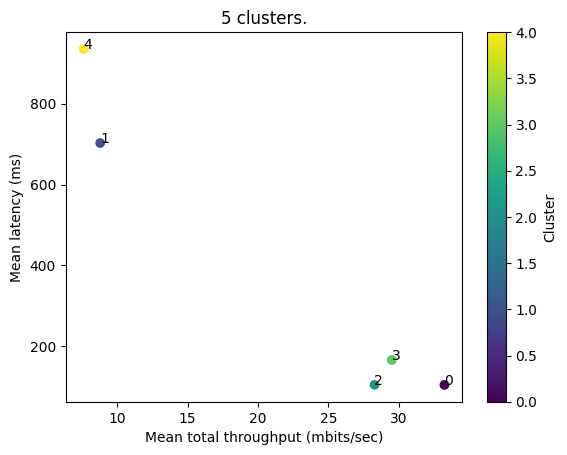

                speed  total_throughput  average_latency
k6_cluster                                              
0            6.902729         24.945852       112.143876
1           13.665513          8.600155       744.909077
2            6.788081         24.640899       106.810560
3           72.107265         27.995955       169.853661
4            9.318513          7.566698       943.522861
5            8.701519         62.058491        95.520137


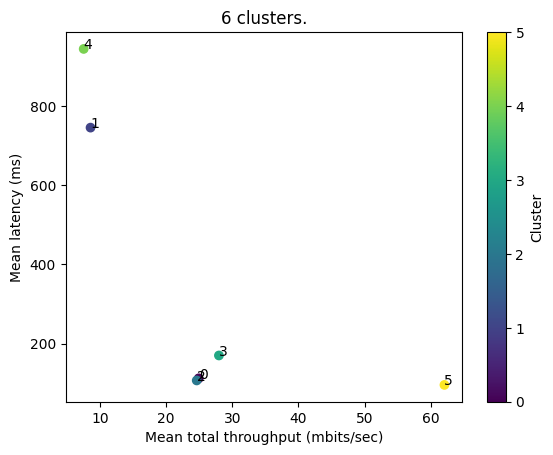

                speed  total_throughput  average_latency
k7_cluster                                              
0            6.580076         24.989247       112.271739
1           13.576604          8.279245       754.699860
2            6.455421         24.513353       107.262957
3           68.451336         30.605991       125.192342
4            8.213140          7.620708       943.628818
5            7.190580         62.266002        95.360367
6           70.397023         24.165714       267.952465


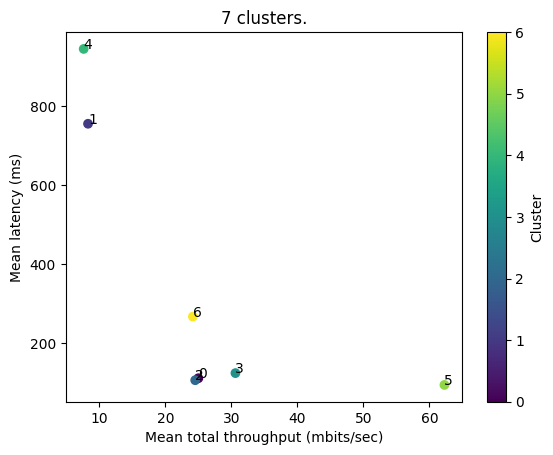

                speed  total_throughput  average_latency
k8_cluster                                              
0            7.712514         25.474602       143.524808
1           10.542194          6.237591       967.573678
2           10.433121         56.581068       100.580472
3            8.518760         19.367666       155.682500
4           74.392862         26.443010       189.728994
5            7.304802         27.445069       113.368119
6            6.772444         23.125370       101.697521
7           10.260749         71.408597        90.323955


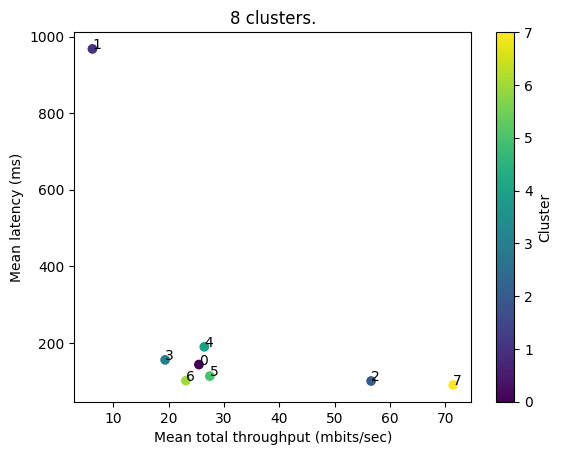

                speed  total_throughput  average_latency
k9_cluster                                              
0            7.743405         25.344552       140.502049
1           10.542498          6.212522       967.955190
2            7.784235         24.455178        96.683270
3            8.463070         19.490989       155.338244
4           74.878766         26.467327       191.800668
5           10.388707         58.303119       101.130670
6            6.664521         24.028395       115.654920
7           10.406258         72.249660        90.690499
8            7.313904         27.259185       113.909691


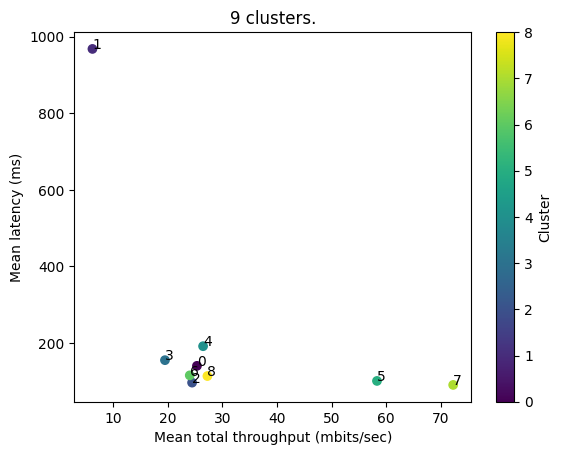

                 speed  total_throughput  average_latency
k10_cluster                                              
0             6.449263         22.241483       117.034544
1             8.978083          7.523487       950.396513
2             9.866439         19.762743       152.013698
3            14.949026          4.982178       959.602399
4            74.643553         26.974455       176.433125
5            10.174196         57.511129        99.196098
6             6.794511         21.448891       103.794957
7            10.388614         79.512360        88.498759
8             7.573310         28.123606       114.436396
9             8.650824         31.147949       126.754752


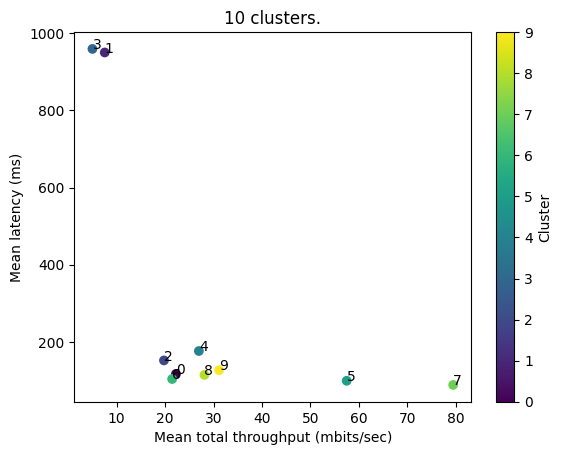

In [8]:
for k in k_kmeans.keys():
    clusters = data[['speed', 'total_throughput', 'average_latency', f'k{k}_cluster']].groupby(f'k{k}_cluster').mean()
    print(clusters)

    for cluster, row in clusters.iterrows():
        plt.annotate(cluster, row[1:])

    plt.title(f"{k} clusters.")
    plt.scatter(clusters['total_throughput'], clusters['average_latency'], c=clusters.index)
    plt.colorbar(label='Cluster')
    plt.xlabel('Mean total throughput (mbits/sec)')
    plt.ylabel('Mean latency (ms)')
    plt.show()

In [15]:
# Data labelling

HL_LT = 0  # high latency low throughput
LL_LT = 1  # low latency low throughput
LL_HT = 2  # low latency high throughput

# These are hand labelled
cluster_class = [
    1,  # 0
    0,  # 1
    1,  # 2
    0,  # 3
    1,  # 4
    2,  # 5
    1,  # 6
    2,  # 7
    1,  # 8
    1,  # 9
]
    

data['class'] = data['k10_cluster'].map(lambda c: cluster_class[c])

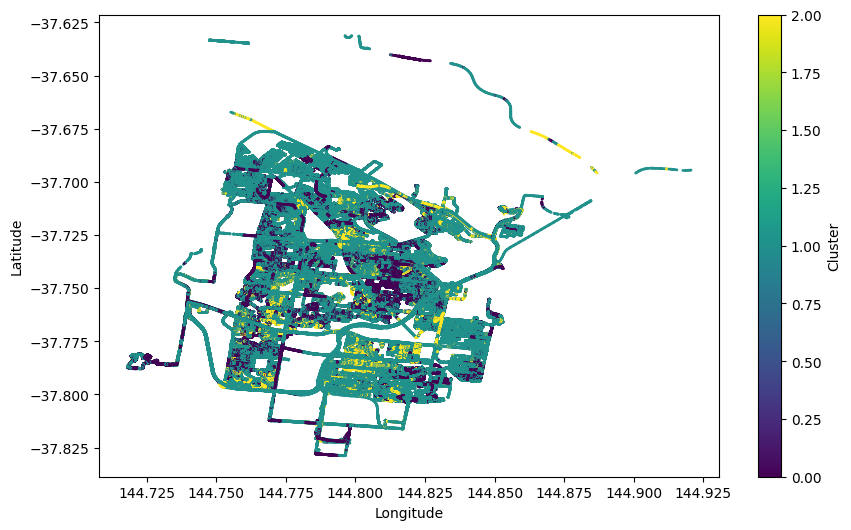

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(data['longitude'], data['latitude'], c=data['class'], s=1)
# plt.scatter(centers['longitude'], centers['latitude'], c='red', marker='X', s=20, label='Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.title(f'{k_to_plot} clusters of 5G Network Performance')
plt.colorbar(label='Cluster')
plt.show()